# **Association Rule**

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import io

#data = pd.read_csv("Groceries_dataset.csv")

data = pd.read_csv(io.BytesIO(uploaded['Groceries_dataset .csv']))
data

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


In [ ]:
data.isnull().any()

Member_number      False
Date               False
itemDescription    False
dtype: bool

Our data has no missing values.

In [ ]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

We can look at the unique items in column 3.

In [ ]:
data.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [ ]:
item_count = data.groupby(by = "itemDescription").size()
item_count

itemDescription
Instant food products      60
UHT-milk                  323
abrasive cleaner           22
artif. sweetener           29
baby cosmetics              3
                         ... 
white bread               362
white wine                176
whole milk               2502
yogurt                   1334
zwieback                   60
Length: 167, dtype: int64

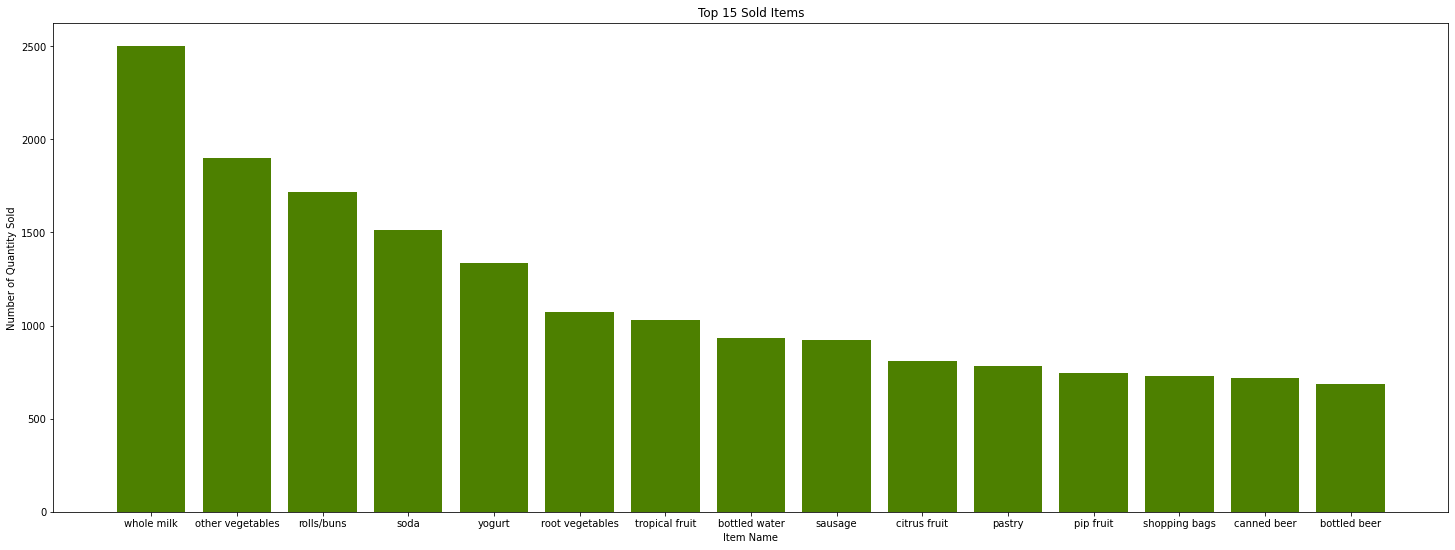

In [ ]:
## Creating distribution of Item Sold
import numpy as np
import matplotlib.pyplot as plt

Item_distr = data.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(15)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(25,9))
plt.bar(x_pos, height, color=(0.3, 0.5, 0, 1))
plt.title("Top 15 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

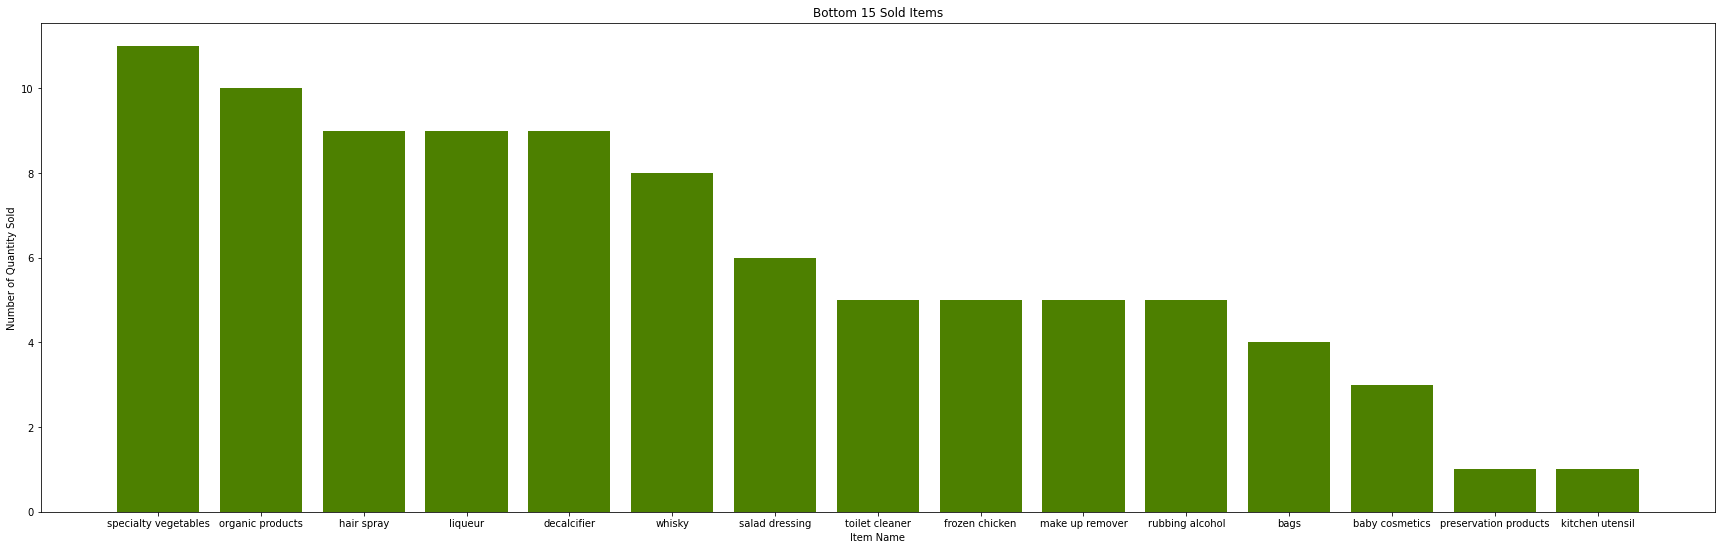

In [ ]:
Item_distr = data.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).tail(15)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))
plt.figure(figsize=(30,9))
plt.bar(x_pos, height, color=(0.3, 0.5, 0, 1))
plt.title("Bottom 15 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [ ]:
month = data.groupby(data['Date'].dt.strftime('%m'))['itemDescription'].count()

import plotly.express as px

fig = px.bar(month, x=month.index, y=month, color=month, labels={'y': 'Number of Sales','Date': 'Months'})
fig.update_layout(title_text='Number of Sales per Discrete Months', title_x=0.5, title_font=dict(size=18))
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.show()

In [ ]:
Sales_weekly = data.resample('w', on='Date').size()
fig = px.line(data, x=Sales_weekly.index, y=Sales_weekly,
              labels={'y': 'Number of Sales',
                     'x': 'Date'})
fig.update_layout(title_text='Number of Sales Weekly',
                  title_x=0.5, title_font=dict(size=18)) 
fig.show()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [ ]:
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [ ]:
data.itemDescription = data.itemDescription.transform(lambda x: [x])
basket = data.groupby(['Member_number','Date']).sum()['itemDescription'].reset_index(drop=True)

encoder = TransactionEncoder()
transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
display(transactions.head())

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
frequent_itemsets = apriori(transactions, min_support= 6/len(basket), use_colnames=True, max_len = 2)
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules)
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(butter milk),0.021386,0.017577,0.000601,0.028125,1.600131,0.000226,1.010854
1,(butter milk),(UHT-milk),0.017577,0.021386,0.000601,0.034221,1.600131,0.000226,1.013289
2,(cream cheese ),(UHT-milk),0.023658,0.021386,0.000869,0.036723,1.717152,0.000363,1.015922
3,(UHT-milk),(cream cheese ),0.021386,0.023658,0.000869,0.040625,1.717152,0.000363,1.017685
4,(artif. sweetener),(soda),0.001938,0.097106,0.000468,0.241379,2.485725,0.000280,1.190178
...,...,...,...,...,...,...,...,...,...
185,(sugar),(spread cheese),0.017710,0.006683,0.000401,0.022642,3.387849,0.000283,1.016328
186,(tropical fruit),(sweet spreads),0.067767,0.004545,0.000735,0.010848,2.387066,0.000427,1.006373
187,(sweet spreads),(tropical fruit),0.004545,0.067767,0.000735,0.161765,2.387066,0.000427,1.112137
188,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908


Rules identified:  190


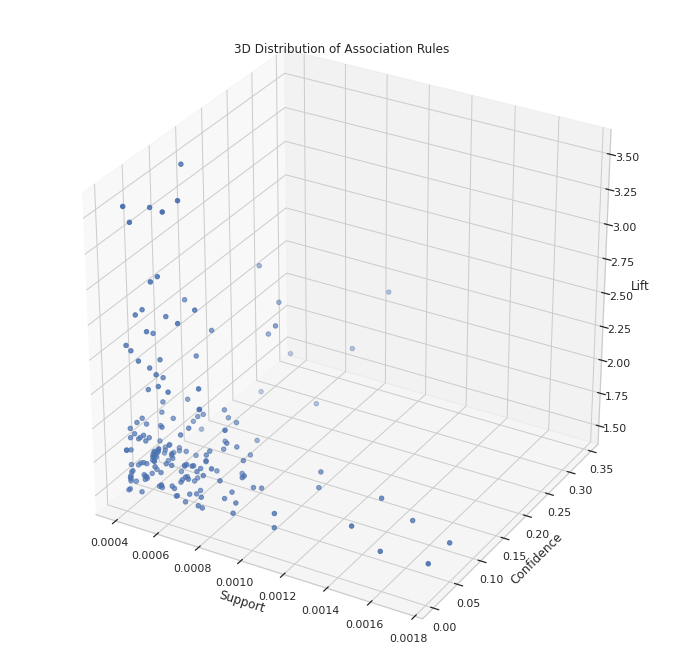

In [ ]:
import seaborn as sns

sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

In [ ]:

milk_rules = rules[rules['consequents'].astype(str).str.contains('whole milk')]
milk_rules = milk_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(milk_rules.head(20))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(brandy),(whole milk),0.002540,0.157923,0.000869,0.342105,2.166281,0.000468,1.279957
1,(softener),(whole milk),0.002740,0.157923,0.000802,0.292683,1.853328,0.000369,1.190523
2,(canned fruit),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
3,(syrup),(whole milk),0.001403,0.157923,0.000401,0.285714,1.809201,0.000179,1.178908
4,(artif. sweetener),(whole milk),0.001938,0.157923,0.000535,0.275862,1.746815,0.000229,1.162868
5,(house keeping products),(whole milk),0.003007,0.157923,0.000735,0.244444,1.547872,0.000260,1.114514
6,(light bulbs),(whole milk),0.001938,0.157923,0.000468,0.241379,1.528463,0.000162,1.110011
